<a href="https://colab.research.google.com/github/Sumetjutha/MyProject/blob/main/8_Explore_NBA_Data_With_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# This code explores the NBA players from 2013 - 2014 season, and
# use a machine learning algorithm called kmeans to group them in clusters,
# this will show which players are most similar

In [85]:
# Import the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# Load the data
# from google.colab import files
# uploaded = files.upload()

In [87]:
nba = pd.read_csv('/content/drive/MyDrive/MyProject/NBA_Data.csv')

In [88]:
nba.head(7)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
0,Vince Carter,ATL,42,76,25,51,1330,16.9,5.9,14.1,41.9,3.7,9.5,38.9,1.4,2.0,71.2,0.9,4.9,5.8,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4
1,Trae Young,ATL,20,81,29,52,2503,24.8,8.4,20.1,41.8,2.5,7.7,32.4,5.5,6.6,82.9,1.0,3.8,4.8,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4
2,Taurean Prince,ATL,25,55,19,36,1552,19.1,6.8,15.3,44.1,3.2,8.1,39.0,2.4,3.0,81.9,0.6,4.6,5.1,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3
3,Omari Spellman,ATL,21,46,15,31,805,13.5,4.9,12.1,40.2,2.2,6.4,34.4,1.6,2.2,71.1,3.6,6.1,9.6,2.3,1.5,1.3,1.2,3.3,34.7,4,0,-10.0
4,Miles Plumlee,ATL,30,18,1,17,173,18.5,7.4,11.1,66.7,0.0,0.0,0.0,3.7,6.9,53.3,3.7,5.3,9.0,3.9,2.3,1.4,0.9,3.2,39.9,0,0,-9.9
5,Kevin Huerter,ATL,20,75,27,48,2049,14.2,5.4,12.8,41.9,2.7,6.9,38.5,0.8,1.1,73.2,1.2,3.6,4.8,4.2,2.1,1.3,0.5,3.0,29.3,1,0,-2.3
6,Kent Bazemore,ATL,29,67,24,43,1643,19.0,6.8,16.8,40.2,2.3,7.3,32.0,3.1,4.3,72.6,0.9,5.5,6.4,3.7,2.9,2.2,1.0,4.1,38.8,0,0,-7.2


In [89]:
# Get the number of rows and columns (481 rows or player and 31 columns or features)
nba.shape

(530, 29)

In [90]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PLAYER     530 non-null    object 
 1   TEAM       530 non-null    object 
 2   AGE        530 non-null    int64  
 3   GP         530 non-null    int64  
 4   W          530 non-null    int64  
 5   L          530 non-null    int64  
 6   MIN        530 non-null    int64  
 7   PTS        530 non-null    float64
 8   FGM        530 non-null    float64
 9   FGA        530 non-null    float64
 10  FG%        530 non-null    float64
 11  3PM        530 non-null    float64
 12  3PA        530 non-null    float64
 13  3P%        530 non-null    float64
 14  FTM        530 non-null    float64
 15  FTA        530 non-null    float64
 16  FT%        530 non-null    float64
 17  OREB       530 non-null    float64
 18  DREB       530 non-null    float64
 19  REB        530 non-null    float64
 20  AST       

In [91]:
nba.columns

Index(['PLAYER', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', 'Plusminus'],
      dtype='object')

In [92]:
nba.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,26.350943,49.247170,24.673585,24.573585,1121.626415,16.530943,6.184151,13.981698,43.991132,1.666604,5.050755,29.028113,2.496981,3.402642,69.677547,1.865849,5.682642,7.546038,3.650189,2.103585,1.264717,0.801887,3.731887,35.151321,4.449057,0.239623,-1.690377
std,4.215985,26.048763,15.891797,14.616563,838.666186,6.540621,2.716688,4.473457,11.181947,1.249498,3.271208,14.937859,1.708920,2.183586,21.488026,2.368704,2.970472,4.282517,2.370624,1.160392,0.866702,0.830831,1.677377,10.167533,10.032191,1.772809,11.138441
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-94.100000
25%,23.000000,27.000000,11.000000,13.000000,322.750000,12.925000,4.800000,11.200000,40.200000,0.700000,3.000000,25.650000,1.300000,2.000000,65.150000,0.700000,3.800000,4.725000,2.000000,1.400000,0.900000,0.300000,2.800000,28.750000,0.000000,0.000000,-5.600000
50%,26.000000,56.000000,24.000000,26.000000,1069.000000,15.850000,5.900000,13.400000,43.850000,1.700000,5.200000,33.150000,2.200000,3.000000,75.000000,1.200000,5.100000,6.600000,3.000000,1.900000,1.200000,0.600000,3.500000,34.000000,0.000000,0.000000,-1.000000
75%,29.000000,73.000000,38.000000,35.000000,1836.500000,19.800000,7.500000,16.275000,48.950000,2.400000,7.100000,36.775000,3.375000,4.500000,81.800000,2.700000,7.100000,9.700000,5.000000,2.600000,1.500000,1.000000,4.500000,40.400000,3.000000,0.000000,2.800000
max,42.000000,82.000000,60.000000,63.000000,3028.000000,83.800000,41.900000,43.900000,100.000000,9.400000,32.900000,100.000000,14.300000,15.100000,100.000000,43.900000,31.400000,43.900000,14.300000,10.700000,10.700000,6.500000,18.800000,83.800000,69.000000,34.000000,75.300000


In [93]:
drop = ['PLAYER','TEAM','AGE','GP','W','L','MIN']

In [94]:
nba_train = nba.drop(columns=drop)
nba_train.head(7)

,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
0,16.9,5.9,14.1,41.9,3.7,9.5,38.9,1.4,2.0,71.2,0.9,4.9,5.8,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4
1,24.8,8.4,20.1,41.8,2.5,7.7,32.4,5.5,6.6,82.9,1.0,3.8,4.8,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4
2,19.1,6.8,15.3,44.1,3.2,8.1,39.0,2.4,3.0,81.9,0.6,4.6,5.1,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3
3,13.5,4.9,12.1,40.2,2.2,6.4,34.4,1.6,2.2,71.1,3.6,6.1,9.6,2.3,1.5,1.3,1.2,3.3,34.7,4,0,-10.0
4,18.5,7.4,11.1,66.7,0.0,0.0,0.0,3.7,6.9,53.3,3.7,5.3,9.0,3.9,2.3,1.4,0.9,3.2,39.9,0,0,-9.9
5,14.2,5.4,12.8,41.9,2.7,6.9,38.5,0.8,1.1,73.2,1.2,3.6,4.8,4.2,2.1,1.3,0.5,3.0,29.3,1,0,-2.3
6,19.0,6.8,16.8,40.2,2.3,7.3,32.0,3.1,4.3,72.6,0.9,5.5,6.4,3.7,2.9,2.2,1.0,4.1,38.8,0,0,-7.2


In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
nba_scaled=pd.DataFrame(scaler.fit_transform(nba_train))

In [98]:
nba_scaled.columns=nba_train.columns

In [99]:
### PCA
from sklearn.decomposition import PCA

In [100]:
n_components=nba_train.shape[1]

In [101]:
pca = PCA(n_components=n_components, random_state=123)

In [102]:
pca.fit(nba_scaled)

PCA(copy=True, iterated_power='auto', n_components=22, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

In [103]:
explained_variance_ratio = pca.explained_variance_ratio_

In [104]:
import numpy as np
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [105]:
lst = []

In [106]:
for i in range (0, n_components):
    lst.append([i+1, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])

In [107]:
pca_predictor = pd.DataFrame(lst)

In [108]:
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']

In [109]:
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.259158,0.259158
1,2,0.203889,0.463046
2,3,0.119249,0.582295
3,4,0.085484,0.667779
4,5,0.065869,0.733648
5,6,0.045905,0.779553
6,7,0.039936,0.819489
7,8,0.035671,0.855160
8,9,0.030837,0.885996
9,10,0.026962,0.912958


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf6f2298d0>)

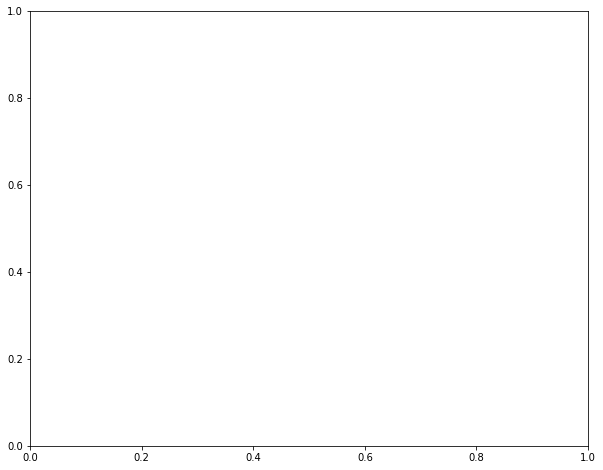

In [110]:
plt.subplots(figsize=(10,8))

<BarContainer object of 22 artists>

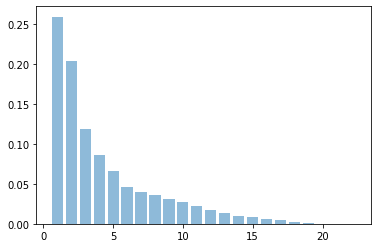

In [111]:
plt.bar(pca_predictor['Component'],pca_predictor['Explained Variance'], align='center', alpha=0.5, 
       label='individual explained variance')

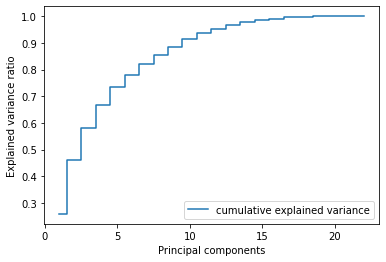

In [112]:
plt.step(pca_predictor['Component'],pca_predictor['Cumulative Explained Variance'], where='mid',label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio');
plt.legend(loc='best')

In [113]:
pca = PCA(n_components=11)
pca.fit(nba_scaled)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [114]:
nba_transformed = pca.fit_transform(nba_scaled)
nba_transformed.shape

(530, 11)

In [115]:
########## K-Mean
from sklearn.cluster import KMeans

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(nba_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [116]:
cluster_labels = kmeans.labels_
nba['cluster'] = cluster_labels

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


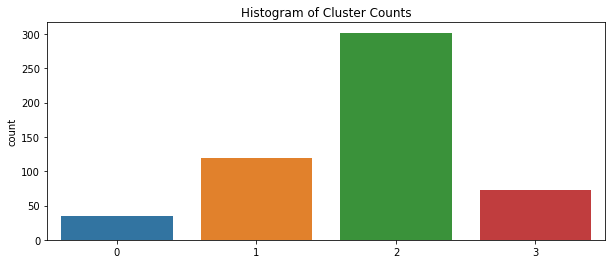

In [117]:
ax=plt.subplots(figsize=(10,4))
ax=sns.countplot(cluster_labels)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [165]:
def cluster_nba(columns):
    output = pd.DataFrame({'cluster':[ i for i in range(n_clusters)]})
    for column in columns:
        lst = []
        for i in range(n_clusters):
            mean = nba[nba['cluster'] == i].describe()[column]['mean']
            lst.append([i, round(mean,2)])
        df = pd.DataFrame(lst)
        df.columns = ['cluster', column]
        output = pd.merge(output, df, on='cluster', how='outer')
    return output

In [166]:
nba.head(7)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
0,Vince Carter,ATL,42,76,25,51,1330,16.9,5.9,14.1,41.9,3.7,9.5,38.9,1.4,2.0,71.2,0.9,4.9,5.8,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4,2
1,Trae Young,ATL,20,81,29,52,2503,24.8,8.4,20.1,41.8,2.5,7.7,32.4,5.5,6.6,82.9,1.0,3.8,4.8,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4,3
2,Taurean Prince,ATL,25,55,19,36,1552,19.1,6.8,15.3,44.1,3.2,8.1,39.0,2.4,3.0,81.9,0.6,4.6,5.1,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3,2
3,Omari Spellman,ATL,21,46,15,31,805,13.5,4.9,12.1,40.2,2.2,6.4,34.4,1.6,2.2,71.1,3.6,6.1,9.6,2.3,1.5,1.3,1.2,3.3,34.7,4,0,-10.0,2
4,Miles Plumlee,ATL,30,18,1,17,173,18.5,7.4,11.1,66.7,0.0,0.0,0.0,3.7,6.9,53.3,3.7,5.3,9.0,3.9,2.3,1.4,0.9,3.2,39.9,0,0,-9.9,1
5,Kevin Huerter,ATL,20,75,27,48,2049,14.2,5.4,12.8,41.9,2.7,6.9,38.5,0.8,1.1,73.2,1.2,3.6,4.8,4.2,2.1,1.3,0.5,3.0,29.3,1,0,-2.3,2
6,Kent Bazemore,ATL,29,67,24,43,1643,19.0,6.8,16.8,40.2,2.3,7.3,32.0,3.1,4.3,72.6,0.9,5.5,6.4,3.7,2.9,2.2,1.0,4.1,38.8,0,0,-7.2,2


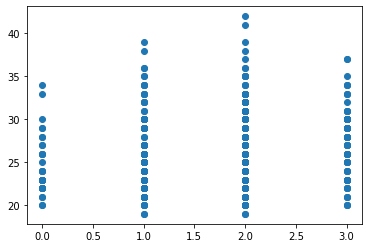

In [167]:
plt.scatter(nba['cluster'],nba['AGE'])

In [168]:
# cluster == 0
cluster_0 = nba[nba['cluster']==0]

In [169]:
cluster_0

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
8,Jordan Sibert,ATL,26,1,1,0,4,28.3,9.4,9.4,100.0,9.4,9.4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.3,0,0,-47.2,0
11,Isaac Humphries,ATL,21,5,1,4,56,10.6,4.3,14.9,28.6,2.1,7.8,27.3,0.0,0.0,0.0,2.8,5.0,7.8,0.0,0.0,0.7,0.0,5.0,22.1,0,0,-15.6,0
20,Tahjere McCall,BKN,24,1,0,1,8,20.1,10.0,15.1,66.7,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,10.0,26.1,0,0,75.3,0
29,Dzanan Musa,BKN,20,9,4,5,39,19.3,9.2,22.4,40.9,1.0,10.2,10.0,0.0,2.0,0.0,1.0,4.1,5.1,2.0,4.1,2.0,0.0,1.0,30.5,0,0,10.2,0
60,Joe Chealey,CHA,23,1,0,1,8,10.3,5.2,15.5,33.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,0.0,0.0,0.0,5.2,18.1,0,0,-15.5,0
62,J.P. Macura,CHA,24,2,1,1,17,14.3,7.1,21.4,33.3,0.0,9.5,0.0,0.0,0.0,0.0,0.0,7.1,7.1,4.8,0.0,0.0,0.0,0.0,29.9,0,0,2.4,0
72,Tyler Ulis,CHI,23,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
91,Kobi Simmons,CLE,21,1,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,66.7,0
94,John Holland,CLE,30,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,54.3,0
124,Tyler Lydon,DEN,23,25,20,5,94,9.8,3.8,7.7,50.0,1.7,4.3,40.0,0.4,1.3,33.3,3.0,4.7,7.7,2.6,1.7,0.9,0.0,4.3,23.8,0,0,-4.7,0


In [170]:
cluster_0.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.0,35.000000,35.0
mean,24.714286,5.342857,3.028571,2.314286,33.257143,11.371429,5.117143,14.745714,31.028571,1.097143,5.705714,18.682857,0.037143,0.814286,1.665714,2.720000,4.277143,7.002857,2.217143,2.002857,1.314286,0.454286,2.811429,26.408571,0.0,0.0,-8.391429,0.0
std,3.417700,6.606338,4.730910,2.752234,47.524819,15.044592,7.348569,10.381243,26.507441,1.903478,6.411705,27.794228,0.164649,1.918201,6.938339,7.421384,5.879180,9.155085,2.864333,2.895177,2.346354,1.268474,4.014149,19.182243,0.0,0.0,35.071988,0.0
min,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-94.100000,0.0
25%,22.000000,1.000000,1.000000,1.000000,5.500000,0.000000,0.000000,9.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,15.300000,0.0,0.0,-18.450000,0.0
50%,24.000000,3.000000,2.000000,1.000000,15.000000,9.000000,3.500000,11.900000,33.300000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.600000,3.100000,5.000000,0.900000,0.900000,0.200000,0.000000,1.000000,23.800000,0.0,0.0,-8.100000,0.0
75%,26.500000,6.000000,3.000000,3.000000,41.500000,13.900000,6.700000,19.200000,45.750000,1.700000,8.400000,30.350000,0.000000,0.100000,0.000000,2.700000,5.050000,7.700000,3.700000,2.600000,1.550000,0.000000,5.000000,30.200000,0.0,0.0,6.300000,0.0
max,34.000000,30.000000,21.000000,11.000000,204.000000,83.800000,41.900000,43.900000,100.000000,9.400000,32.900000,100.000000,0.900000,7.800000,33.300000,43.900000,31.400000,43.900000,10.200000,10.700000,10.700000,6.500000,18.800000,83.800000,0.0,0.0,75.300000,0.0


In [171]:
mean_cluster_0 = pd.DataFrame(cluster_0.mean()).T

In [172]:
mean_cluster_0

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
0,24.714286,5.342857,3.028571,2.314286,33.257143,11.371429,5.117143,14.745714,31.028571,1.097143,5.705714,18.682857,0.037143,0.814286,1.665714,2.72,4.277143,7.002857,2.217143,2.002857,1.314286,0.454286,2.811429,26.408571,0.0,0.0,-8.391429,0.0


In [173]:
# cluster == 1
cluster_1 = nba[nba['cluster']==1]

In [174]:
cluster_1.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0
mean,26.016667,47.508333,23.283333,24.225000,924.500000,16.650833,6.590833,12.708333,52.269167,0.395833,1.469167,16.018333,3.071667,4.579167,67.240833,3.75250,8.202500,11.958333,2.605000,2.163333,1.320833,1.615000,4.930000,41.544167,7.416667,0.016667,-1.525000,1.0
std,4.568771,25.131585,14.772893,14.373448,730.985889,4.677768,1.997814,3.276568,10.561551,0.593154,1.776684,15.806578,1.317955,1.972666,10.969350,1.33957,2.576117,3.210398,1.215367,0.835849,0.908124,1.046294,1.541177,7.244874,12.766542,0.128556,6.284652,0.0
min,19.000000,2.000000,0.000000,1.000000,11.000000,6.300000,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.300000,0.600000,33.300000,0.00000,3.100000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,28.700000,0.000000,0.000000,-20.100000,1.0
25%,22.000000,24.000000,12.000000,13.000000,245.000000,13.725000,5.300000,10.350000,48.950000,0.000000,0.100000,0.000000,2.275000,3.375000,60.000000,3.00000,6.500000,10.000000,1.700000,1.700000,0.900000,0.900000,3.875000,36.400000,0.000000,0.000000,-5.375000,1.0
50%,25.000000,51.000000,23.000000,24.500000,785.000000,16.200000,6.400000,12.250000,53.000000,0.100000,0.800000,15.500000,2.800000,4.400000,68.450000,3.65000,7.900000,11.900000,2.500000,2.100000,1.200000,1.450000,4.950000,41.950000,1.000000,0.000000,-2.250000,1.0
75%,29.000000,68.250000,32.250000,34.000000,1522.250000,19.900000,7.925000,14.700000,58.750000,0.700000,2.425000,31.475000,3.800000,5.600000,74.850000,4.42500,9.350000,13.625000,3.300000,2.600000,1.500000,2.100000,6.025000,45.625000,9.250000,0.000000,2.625000,1.0
max,39.000000,82.000000,56.000000,55.000000,2687.000000,28.200000,12.500000,22.100000,71.600000,2.900000,9.100000,50.000000,7.600000,15.100000,100.000000,10.00000,23.500000,29.800000,6.000000,4.600000,7.600000,5.900000,10.100000,74.100000,69.000000,1.000000,25.100000,1.0


In [175]:
mean_cluster_1 = pd.DataFrame(cluster_1.mean()).T

In [176]:
mean_cluster_1

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
0,26.016667,47.508333,23.283333,24.225,924.5,16.650833,6.590833,12.708333,52.269167,0.395833,1.469167,16.018333,3.071667,4.579167,67.240833,3.7525,8.2025,11.958333,2.605,2.163333,1.320833,1.615,4.93,41.544167,7.416667,0.016667,-1.525,1.0


In [177]:
# cluster == 2
cluster_2 = nba[nba['cluster']==2]

In [178]:
cluster_2

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
0,Vince Carter,ATL,42,76,25,51,1330,16.9,5.9,14.1,41.9,3.7,9.5,38.9,1.4,2.0,71.2,0.9,4.9,5.8,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4,2
2,Taurean Prince,ATL,25,55,19,36,1552,19.1,6.8,15.3,44.1,3.2,8.1,39.0,2.4,3.0,81.9,0.6,4.6,5.1,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3,2
3,Omari Spellman,ATL,21,46,15,31,805,13.5,4.9,12.1,40.2,2.2,6.4,34.4,1.6,2.2,71.1,3.6,6.1,9.6,2.3,1.5,1.3,1.2,3.3,34.7,4,0,-10.0,2
5,Kevin Huerter,ATL,20,75,27,48,2049,14.2,5.4,12.8,41.9,2.7,6.9,38.5,0.8,1.1,73.2,1.2,3.6,4.8,4.2,2.1,1.3,0.5,3.0,29.3,1,0,-2.3,2
6,Kent Bazemore,ATL,29,67,24,43,1643,19.0,6.8,16.8,40.2,2.3,7.3,32.0,3.1,4.3,72.6,0.9,5.5,6.4,3.7,2.9,2.2,1.0,4.1,38.8,0,0,-7.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Ron Baker,WAS,26,15,4,11,152,3.7,1.1,5.3,20.0,0.3,3.4,7.7,1.3,1.6,83.3,0.3,2.6,2.9,3.9,1.3,1.6,0.3,4.7,17.3,0,0,-5.3,2
519,Jordan McRae,WAS,28,27,9,18,333,19.2,7.3,15.6,46.9,1.2,4.2,28.6,3.4,4.2,80.0,0.7,4.1,4.8,3.6,1.8,1.6,0.8,3.1,35.8,0,0,-2.6,2
521,Jeff Green,WAS,32,77,29,48,2097,18.0,6.2,13.1,47.5,2.1,6.1,34.7,3.5,3.9,88.8,1.1,4.8,5.9,2.6,1.9,0.8,0.7,3.1,31.8,2,0,-1.8,2
527,Chasson Randle,WAS,26,49,19,30,743,14.6,4.9,11.7,41.9,2.5,6.2,40.0,2.3,3.3,69.4,0.5,2.5,3.0,5.2,2.3,1.3,0.2,4.9,28.3,0,0,-5.9,2


In [179]:
cluster_2.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.0
mean,26.450331,52.635762,26.029801,26.605960,1160.000000,15.295695,5.593046,13.279139,41.963907,2.130132,6.151987,34.193046,1.984106,2.584437,76.621192,1.136093,4.701656,5.832781,3.414901,1.833113,1.205960,0.557616,3.496689,30.872185,1.165563,0.033113,-1.694371,2.0
std,4.117363,23.637344,15.181595,13.870319,761.624859,3.924361,1.504252,3.040370,5.437136,0.934705,2.140213,7.750909,0.919706,1.127513,10.799035,0.768561,1.575697,2.049589,1.846684,0.753660,0.515891,0.423235,1.027587,5.206661,2.196132,0.242282,6.869969,0.0
min,19.000000,1.000000,0.000000,0.000000,19.000000,3.700000,1.100000,5.300000,20.000000,0.000000,1.100000,0.000000,0.400000,0.400000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,14.700000,0.000000,0.000000,-37.500000,2.0
25%,23.000000,35.000000,13.000000,16.250000,448.000000,12.725000,4.525000,11.325000,39.625000,1.525000,4.800000,31.725000,1.300000,1.800000,70.475000,0.600000,3.600000,4.325000,2.000000,1.300000,0.900000,0.300000,2.800000,27.525000,0.000000,0.000000,-5.775000,2.0
50%,26.000000,58.000000,25.500000,27.000000,1151.000000,15.000000,5.400000,13.000000,42.000000,2.100000,6.000000,34.600000,1.900000,2.450000,78.050000,0.900000,4.600000,5.600000,2.950000,1.700000,1.200000,0.500000,3.400000,30.750000,0.000000,0.000000,-1.200000,2.0
75%,29.000000,73.000000,39.000000,36.000000,1799.250000,17.600000,6.400000,15.175000,45.150000,2.600000,7.400000,37.700000,2.600000,3.300000,83.250000,1.500000,5.775000,7.100000,4.575000,2.200000,1.500000,0.700000,4.100000,34.375000,1.000000,0.000000,2.075000,2.0
max,42.000000,82.000000,60.000000,63.000000,2802.000000,27.300000,9.900000,21.300000,66.700000,6.200000,15.600000,100.000000,4.900000,6.100000,100.000000,4.800000,9.400000,13.400000,8.900000,6.000000,2.800000,3.100000,7.800000,45.300000,14.000000,3.000000,43.600000,2.0


In [180]:
mean_cluster_2 = pd.DataFrame(cluster_2.mean()).T

In [181]:
mean_cluster_2

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
0,26.450331,52.635762,26.029801,26.60596,1160.0,15.295695,5.593046,13.279139,41.963907,2.130132,6.151987,34.193046,1.984106,2.584437,76.621192,1.136093,4.701656,5.832781,3.414901,1.833113,1.20596,0.557616,3.496689,30.872185,1.165563,0.033113,-1.694371,2.0


In [183]:
# cluster == 3
cluster_3 = nba[nba['cluster']==3]

In [184]:
cluster_3

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
1,Trae Young,ATL,20,81,29,52,2503,24.8,8.4,20.1,41.8,2.5,7.7,32.4,5.5,6.6,82.9,1.0,3.8,4.8,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4,3
9,John Collins,ATL,21,61,24,37,1828,26.0,10.2,18.2,56.0,1.2,3.5,34.8,4.4,5.8,76.3,4.8,8.2,13.0,2.6,2.6,0.5,0.9,4.4,47.0,32,0,-1.7,3
21,Spencer Dinwiddie,BKN,26,68,36,32,1914,23.9,7.6,17.3,44.2,2.6,7.7,33.5,6.0,7.4,80.6,0.5,2.9,3.5,6.5,3.2,0.8,0.4,3.9,38.2,2,0,-1.8,3
22,Shabazz Napier,BKN,27,56,26,30,983,21.5,6.9,17.7,38.9,3.1,9.3,33.3,4.7,5.6,83.3,0.7,3.3,4.1,5.8,2.7,1.7,0.7,2.7,39.4,1,0,0.6,3
31,D'Angelo Russell,BKN,23,81,42,39,2448,28.0,10.8,24.8,43.4,3.8,10.4,36.9,2.6,3.3,78.0,0.9,4.3,5.1,9.2,4.1,1.6,0.3,2.3,49.7,14,0,0.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Ricky Rubio,UTA,28,68,40,28,1899,18.2,6.2,15.4,40.4,1.7,5.4,31.1,4.1,4.8,85.5,0.7,4.4,5.1,8.8,3.8,1.9,0.2,3.8,40.1,7,0,5.3,3
508,Donovan Mitchell,UTA,22,77,49,28,2598,28.2,10.2,23.6,43.2,2.9,8.0,36.2,4.9,6.1,80.6,0.9,4.0,4.9,5.0,3.4,1.6,0.5,3.2,44.4,1,0,5.7,3
510,Dante Exum,UTA,23,42,21,21,664,17.3,6.1,14.5,41.9,1.1,3.7,29.0,4.1,5.2,79.1,1.0,3.1,4.1,6.6,3.1,0.8,0.3,4.2,32.5,1,0,2.9,3
520,John Wall,WAS,28,32,11,21,1104,24.0,8.9,20.0,44.4,1.8,6.1,30.2,4.4,6.3,69.7,0.5,3.7,4.2,10.1,4.4,1.8,1.1,2.6,48.3,10,0,-5.5,3


In [185]:
cluster_3.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,27.273973,59.136986,31.726027,27.410959,1808.739726,23.917808,8.472603,18.615068,44.984932,2.110959,6.068493,34.006849,4.853425,6.094521,77.565753,1.373973,6.272603,7.641096,7.028767,3.172603,1.391781,0.642466,3.176712,46.536986,15.287671,1.575342,1.267123,3.0
std,4.160864,22.264393,15.219012,12.402773,856.193304,5.673876,2.250325,3.595625,8.048890,1.255163,2.667754,11.807523,2.193620,2.414418,12.631577,1.006786,3.350674,3.957301,2.468495,0.963970,0.637433,0.562958,1.172192,8.496838,16.164501,4.551916,6.111352,0.0
min,20.000000,1.000000,0.000000,0.000000,6.000000,12.400000,0.000000,7.200000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,2.100000,1.800000,0.000000,0.000000,0.000000,0.000000,31.300000,0.000000,0.000000,-21.500000,3.0
25%,24.000000,46.000000,20.000000,19.000000,1250.000000,19.800000,7.100000,15.900000,42.500000,1.300000,4.200000,31.400000,3.600000,4.500000,73.100000,0.700000,4.000000,4.900000,5.100000,2.500000,1.000000,0.300000,2.500000,40.400000,2.000000,0.000000,-1.700000,3.0
50%,27.000000,67.000000,32.000000,28.000000,2059.000000,23.600000,8.600000,19.200000,44.400000,2.000000,5.900000,34.700000,4.500000,5.800000,80.400000,1.000000,5.500000,6.400000,6.800000,3.300000,1.400000,0.500000,3.000000,45.700000,11.000000,0.000000,1.700000,3.0
75%,30.000000,77.000000,43.000000,37.000000,2503.000000,28.100000,10.200000,21.400000,48.200000,2.800000,7.700000,36.900000,6.000000,7.500000,84.400000,1.700000,7.800000,9.100000,8.600000,3.800000,1.800000,0.800000,3.700000,49.700000,20.000000,1.000000,5.000000,3.0
max,37.000000,82.000000,59.000000,52.000000,3028.000000,39.300000,14.300000,26.600000,66.700000,7.100000,14.300000,100.000000,14.300000,14.300000,100.000000,4.800000,21.500000,21.500000,14.300000,5.400000,3.700000,2.900000,7.400000,68.600000,60.000000,34.000000,14.300000,3.0


In [186]:
mean_cluster_3 = pd.DataFrame(cluster_3.mean()).T

In [187]:
mean_cluster_3

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
0,27.273973,59.136986,31.726027,27.410959,1808.739726,23.917808,8.472603,18.615068,44.984932,2.110959,6.068493,34.006849,4.853425,6.094521,77.565753,1.373973,6.272603,7.641096,7.028767,3.172603,1.391781,0.642466,3.176712,46.536986,15.287671,1.575342,1.267123,3.0


In [197]:
mean_cluster_0.append([mean_cluster_1,mean_cluster_2,mean_cluster_3],ignore_index = True)

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus,cluster
0,24.714286,5.342857,3.028571,2.314286,33.257143,11.371429,5.117143,14.745714,31.028571,1.097143,5.705714,18.682857,0.037143,0.814286,1.665714,2.720000,4.277143,7.002857,2.217143,2.002857,1.314286,0.454286,2.811429,26.408571,0.000000,0.000000,-8.391429,0.0
1,26.016667,47.508333,23.283333,24.225000,924.500000,16.650833,6.590833,12.708333,52.269167,0.395833,1.469167,16.018333,3.071667,4.579167,67.240833,3.752500,8.202500,11.958333,2.605000,2.163333,1.320833,1.615000,4.930000,41.544167,7.416667,0.016667,-1.525000,1.0
2,26.450331,52.635762,26.029801,26.605960,1160.000000,15.295695,5.593046,13.279139,41.963907,2.130132,6.151987,34.193046,1.984106,2.584437,76.621192,1.136093,4.701656,5.832781,3.414901,1.833113,1.205960,0.557616,3.496689,30.872185,1.165563,0.033113,-1.694371,2.0
3,27.273973,59.136986,31.726027,27.410959,1808.739726,23.917808,8.472603,18.615068,44.984932,2.110959,6.068493,34.006849,4.853425,6.094521,77.565753,1.373973,6.272603,7.641096,7.028767,3.172603,1.391781,0.642466,3.176712,46.536986,15.287671,1.575342,1.267123,3.0


In [195]:
mean_cluster_all = mean_cluster_0.append([mean_cluster_1,mean_cluster_2,mean_cluster_3],ignore_index = True)

In [196]:
print(mean_cluster_all)

         AGE         GP          W  ...       TD3  Plusminus  cluster
0  24.714286   5.342857   3.028571  ...  0.000000  -8.391429      0.0
1  26.016667  47.508333  23.283333  ...  0.016667  -1.525000      1.0
2  26.450331  52.635762  26.029801  ...  0.033113  -1.694371      2.0
3  27.273973  59.136986  31.726027  ...  1.575342   1.267123      3.0

[4 rows x 28 columns]
